## Read and Clean data

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
sales = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

sales = sales.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

sales["Price"] = sanitize_numbers(sales["Price"])
sales["Sales"] = sanitize_numbers(sales["Sales"])
sales["Sales Last Year"] = sanitize_numbers(sales["Sales Last Year"])
sales["Views"] = sanitize_numbers(sales["Views"])
sales["Views Last Year"] = sanitize_numbers(sales["Views Last Year"])
sales["Views Last Year"] = sales["Views Last Year"]
sales["Quantity"] = sanitize_numbers(sales["Quantity"])
sales["Quantity Last Year"] = sanitize_numbers(sales["Quantity Last Year"])
sales["Name"] = sales["Name"].astype("string")
sales["Category"] = sales["Category"].astype("category")
sales["Type"] = sales["Type"].astype("string")
sales["Region"] = sales["Region"].astype("string")
sales["Location"] = sales["Location"].astype("string")
sales["Additional Service"] = sales["Additional Service"].astype("string")


## Basic description

In [92]:
sales.describe(exclude=["int64", "string", "category"])

,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,289.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,39.010381,371.962630,3417.973486,631.177453,17.139875,1733.129958,606.592902,9.200418
std,21.668667,633.333879,17987.235829,3104.479209,87.996216,9544.780526,3427.975840,52.401467
min,10.000000,29.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,154.450000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,215.900000,221.550000,82.000000,1.000000,0.000000,42.000000,0.000000
75%,60.000000,359.400000,1098.940000,296.500000,6.000000,457.665000,295.500000,2.000000
max,150.000000,7531.900000,227698.100000,56225.000000,1519.000000,130537.920000,61171.000000,871.000000


# Analysis: Aggregates (Categories, Regions, Duration, Product Types) vs Indicators (Sales, Quantities, Conversion Rates)

## --- Categories ---

### Categories Weight in last year's Sales


total Sales last year: 830169.25 euros



,Sales Last Year (in euros),Weight (in %)
Category,,
Astronaute,0.00,0.00
montgolfière / ballon,0.00,0.00
simulateur de chute libre,0.00,0.00
Simulateur de vol,1914.75,0.23
avion de chasse,9082.83,1.09
ULM,60566.50,7.30
Avion,83980.33,10.12
Hélicoptère,171365.51,20.64
montgolfière,503259.33,60.62


Text(0.5, 1.0, 'Category repartition in Last Year Sales')

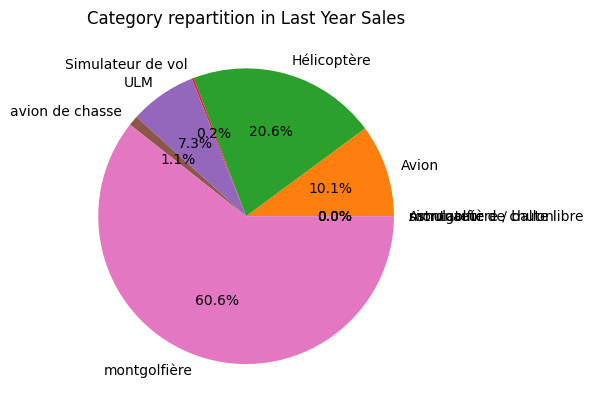

In [93]:
sales_by_category = sales.groupby("Category")["Sales"].sum()
sales_by_category_last_year = sales.groupby("Category")["Sales Last Year"].sum()
categories = sales_by_category.keys()

print(sales_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category_last_year, labels=sales_by_category_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Sales")


### Categories Weight in this year's Sales



total Sales this year: 1637209.3 euros



,Sales (in euros),Weight (in %)
Category,,
Astronaute,0.00,0.00
montgolfière / ballon,0.00,0.00
simulateur de chute libre,0.00,0.00
Simulateur de vol,3379.95,0.21
avion de chasse,8937.02,0.55
Avion,73772.90,4.51
ULM,91299.87,5.58
Hélicoptère,230993.12,14.11
montgolfière,1228826.44,75.06


Text(0.5, 1.0, 'Category repartition in This Year Sales')

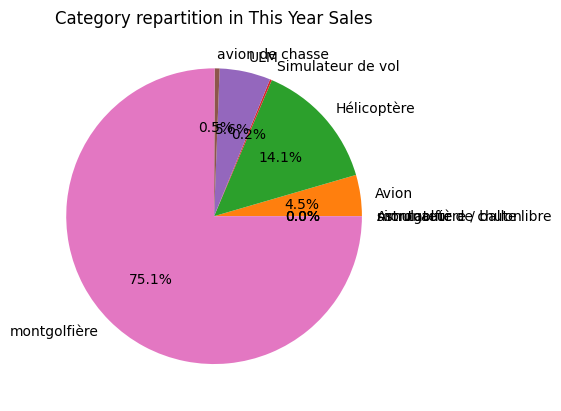

In [94]:
print(sales_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Sales")

### Sales evolution by Category

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Category,,,
Avion,83980.33,73772.90,-12.15
avion de chasse,9082.83,8937.02,-1.61
Hélicoptère,171365.51,230993.12,34.80
ULM,60566.50,91299.87,50.74
Simulateur de vol,1914.75,3379.95,76.52
montgolfière,503259.33,1228826.44,144.17
Astronaute,0.00,0.00,NaN
montgolfière / ballon,0.00,0.00,NaN
simulateur de chute libre,0.00,0.00,NaN


Text(0.5, 1.0, 'Sales (in euros) by Category by Year')

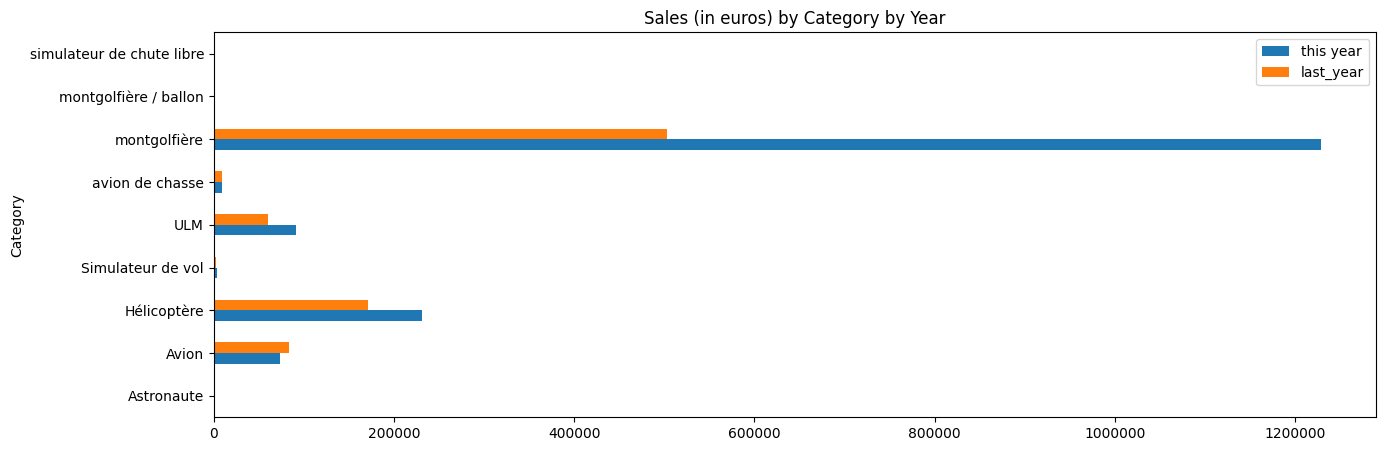

In [95]:
from matplotlib.ticker import FormatStrFormatter

sales_evo_by_category = pd.concat([sales_by_category_last_year, sales_by_category], axis=1)
percentage = (sales_evo_by_category[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_category, "last_year":sales_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
ax.set_title("Sales (in euros) by Category by Year")

### Categories Weight in last year's Quantities

total Quantity last year: 4407.0 units



,Sales Last Year (in quantity),Weight (in %)
Category,,
Astronaute,0.0,0.00
montgolfière / ballon,0.0,0.00
simulateur de chute libre,0.0,0.00
avion de chasse,4.0,0.09
Simulateur de vol,19.0,0.43
Avion,578.0,13.12
Hélicoptère,791.0,17.95
ULM,814.0,18.47
montgolfière,2201.0,49.94


Text(0.5, 1.0, 'Category repartition in Last Year Quantity')

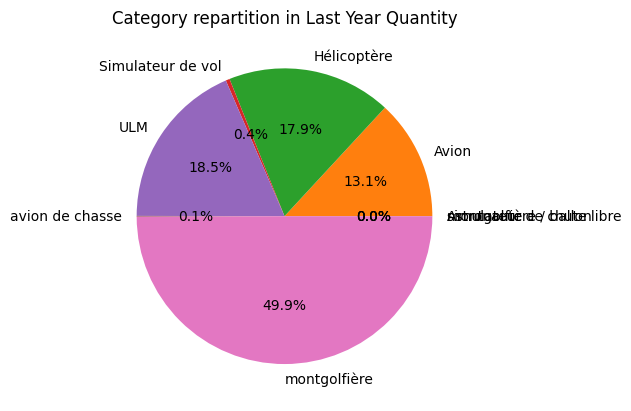

In [96]:
quantity_by_category = sales.groupby("Category")["Quantity"].sum()
quantity_by_category_last_year = sales.groupby("Category")["Quantity Last Year"].sum()
categories = quantity_by_category.keys()

print(quantity_by_category_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category_last_year, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in Last Year Quantities")

### Categories Weight in this year's Quantities

total Quantity: 8210.0 units



,Sales (in quantity),Weight (in %)
Category,,
Astronaute,0.0,0.00
montgolfière / ballon,0.0,0.00
simulateur de chute libre,0.0,0.00
avion de chasse,3.0,0.04
Simulateur de vol,34.0,0.41
Avion,582.0,7.09
ULM,1034.0,12.59
Hélicoptère,1188.0,14.47
montgolfière,5369.0,65.40


Text(0.5, 1.0, 'Category repartition in This Year Quantities')

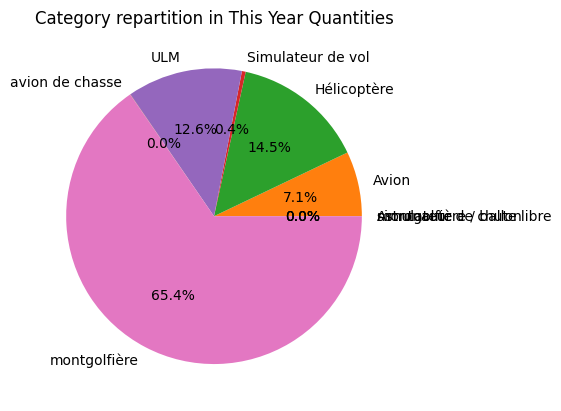

In [97]:
print(quantity_by_category.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_category, labels=categories, autopct='%1.1f%%')
ax.set_title("Category repartition in This Year Quantities")

### Quantities evolution by Category

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Category,,,
avion de chasse,4.0,3.0,-25.00
Avion,578.0,582.0,0.69
ULM,814.0,1034.0,27.03
Hélicoptère,791.0,1188.0,50.19
Simulateur de vol,19.0,34.0,78.95
montgolfière,2201.0,5369.0,143.93
Astronaute,0.0,0.0,NaN
montgolfière / ballon,0.0,0.0,NaN
simulateur de chute libre,0.0,0.0,NaN


Text(0.5, 1.0, 'Sales (in quantity) by Category by Year')

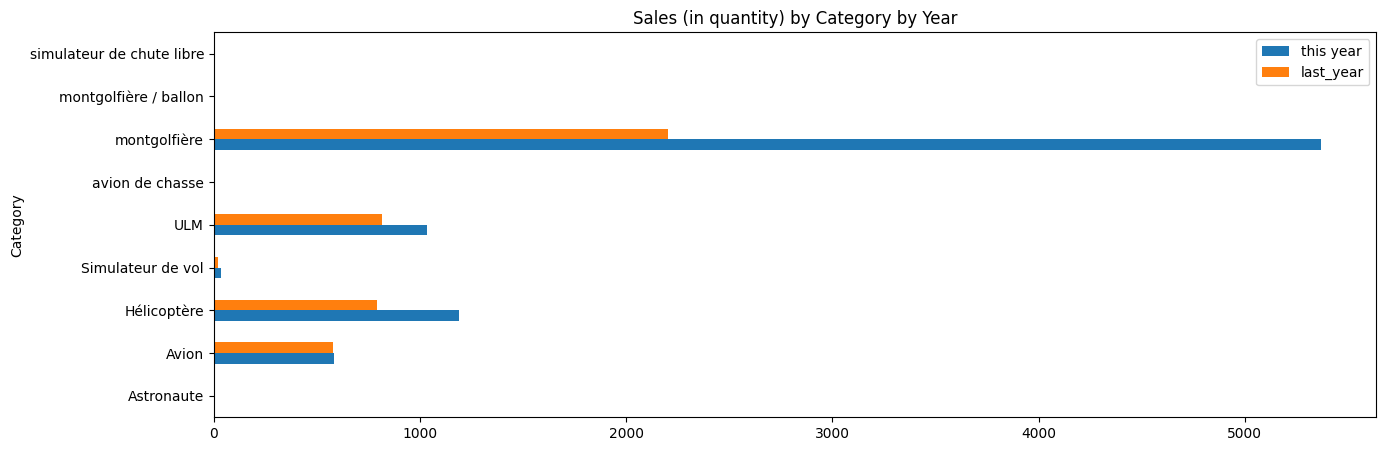

In [98]:
quantities_evo_by_category = pd.concat([quantity_by_category_last_year, quantity_by_category], axis=1)
percentage = (quantities_evo_by_category[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_category, "last_year":quantity_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantity) by Category by Year")

### Conversion Rate Evolution By Category

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Category,,,
Astronaute,335.0,0.0,0.00
simulateur de chute libre,15.0,0.0,0.00
avion de chasse,5440.0,4.0,0.07
montgolfière,169042.0,2201.0,1.30
Hélicoptère,51810.0,791.0,1.53
Avion,29706.0,578.0,1.95
Simulateur de vol,919.0,19.0,2.07
ULM,33291.0,814.0,2.45
montgolfière / ballon,0.0,0.0,NaN


,Views,Sales (in quantity),Conversion Rate (in %)
Category,,,
Astronaute,1128.0,0.0,0.00
montgolfière / ballon,12.0,0.0,0.00
avion de chasse,8172.0,3.0,0.04
Hélicoptère,60097.0,1188.0,1.98
montgolfière,189592.0,5369.0,2.83
Simulateur de vol,1132.0,34.0,3.00
Avion,17065.0,582.0,3.41
ULM,25136.0,1034.0,4.11
simulateur de chute libre,0.0,0.0,NaN


Text(0.5, 1.0, 'Conversion Rate Evolution By Category')

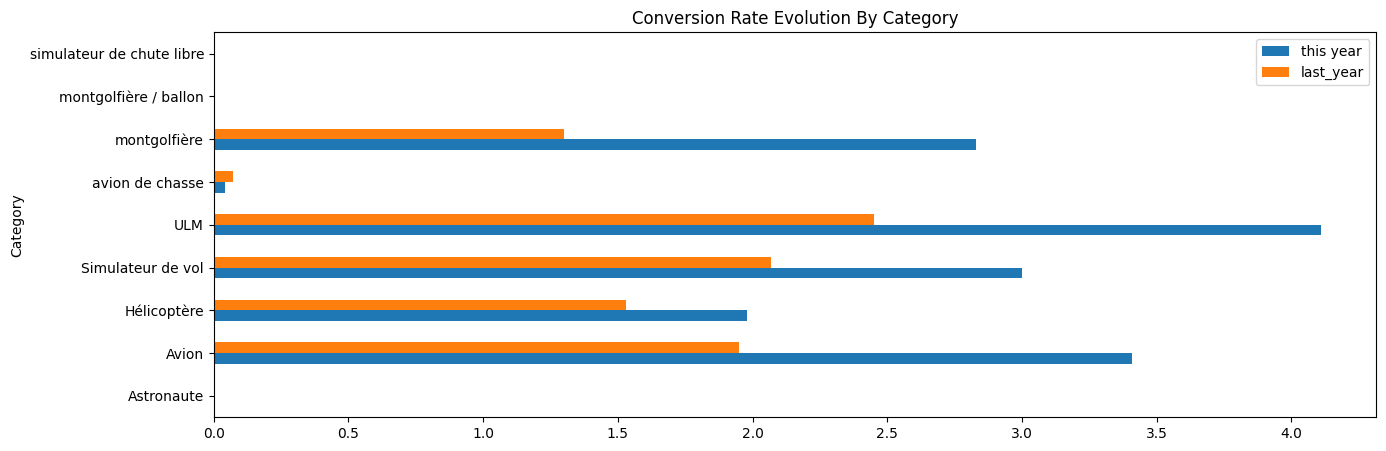

In [124]:
sales["Conversion Rate"] =  sales["Quantity"] * 100 / sales["Views"]
sales["Conversion Rate Last Year"] =  sales["Quantity Last Year"] * 100 / sales["Views Last Year"]

views_by_category = sales.groupby("Category")["Views"].sum()
views_by_category_last_year = sales.groupby("Category")["Views Last Year"].sum()

conversion_rate_by_category = pd.Series((quantity_by_category * 100 / views_by_category).round(2), name="Conversion Rate")
conversion_rate_by_category_last_year = pd.Series((quantity_by_category_last_year * 100 / views_by_category_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_category_last_year, quantity_by_category_last_year, conversion_rate_by_category_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_category, quantity_by_category, conversion_rate_by_category.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_category, "last_year":conversion_rate_by_category_last_year}, index=categories)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Category")

## --- Regions ---


### Regions Weight in last year's Sales

total Sales last year: 830169.25 euros



,Sales Last Year (in euros),Weight (in %)
Region,,
Bretagne,0.00,0.00
Franche-Comté,0.00,0.00
Grand Est,0.00,0.00
Pays de la Loire,782.92,0.09
Bourgogne-Franche-Comté,1494.83,0.18
hors france,4790.83,0.58
Hauts-de-France,7935.17,0.96
Occitanie,10929.57,1.32
PACA & Corse,12512.50,1.51


Text(0.5, 1.0, 'Region repartition in Last Year Sales')

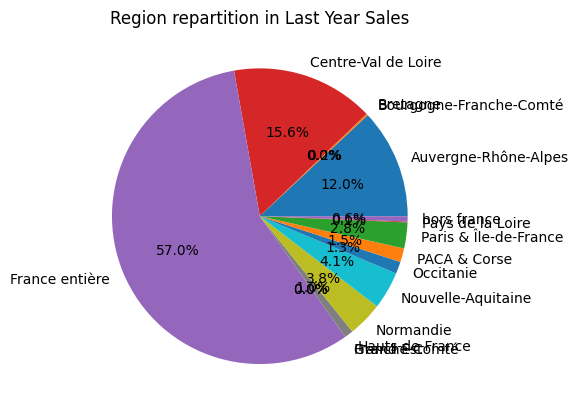

In [134]:
sales_by_region = sales.groupby("Region")["Sales"].sum()
sales_by_region_last_year = sales.groupby("Region")["Sales Last Year"].sum()
regions = sales_by_region.keys()

print(sales_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region_last_year, labels=sales_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Sales")

### Regions weight in this year's Sales

total Sales this year: 1637209.3 euros



,Sales (in euros),Weight (in %)
Region,,
hors france,4047.99,0.04
Franche-Comté,998.20,0.05
Bretagne,5007.68,0.38
Pays de la Loire,4695.01,0.38
Grand Est,18537.76,0.79
PACA & Corse,12673.17,0.84
Occitanie,27124.78,1.28
Bourgogne-Franche-Comté,39540.09,2.34
Nouvelle-Aquitaine,48995.70,3.54


Text(0.5, 1.0, 'Region repartition in this Year Sales')

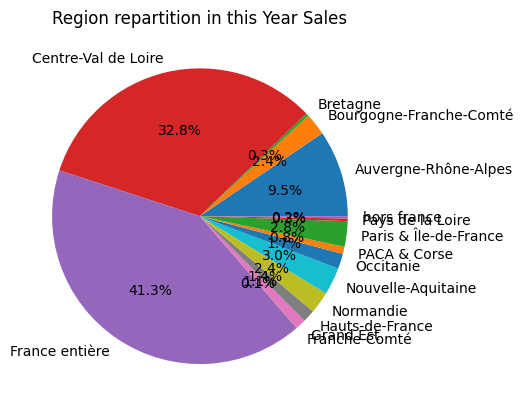

In [135]:
print(sales_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_region, labels=sales_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Sales")

### Sales evolution by Region

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Region,,,
hors france,4790.83,4047.99,-15.51
PACA & Corse,12512.50,12673.17,1.28
Normandie,31604.17,39126.36,23.80
France entière,473295.17,676695.48,42.98
Nouvelle-Aquitaine,34097.49,48995.70,43.69
Auvergne-Rhône-Alpes,99454.25,155318.22,56.17
Paris & Île-de-France,23511.01,45698.93,94.37
Occitanie,10929.57,27124.78,148.18
Hauts-de-France,7935.17,22175.77,179.46


Text(0.5, 1.0, 'Sales (in euros) by region by Year')

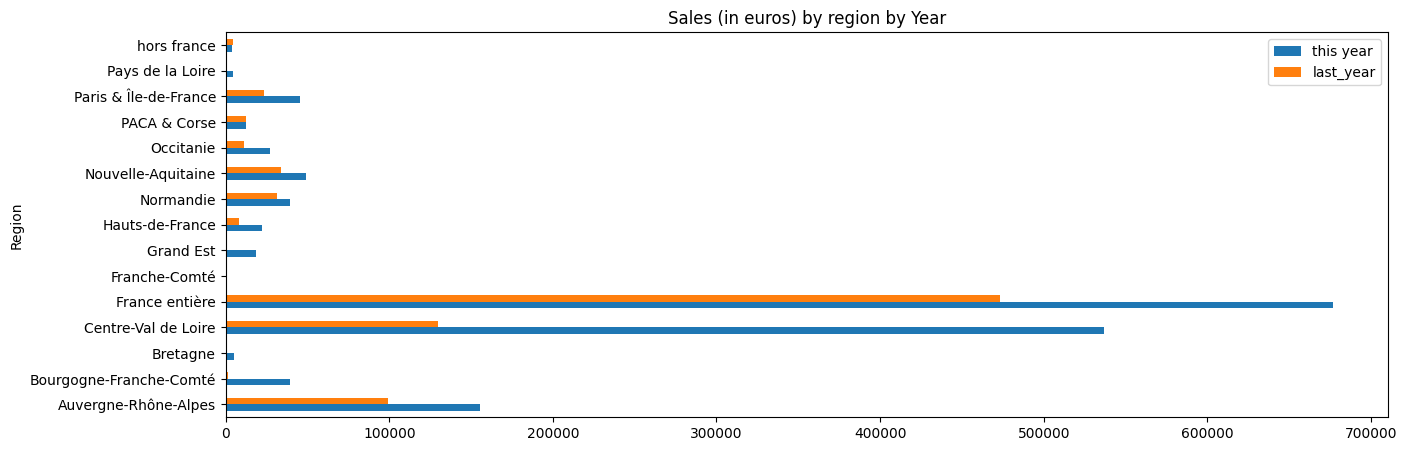

In [117]:
sales_evo_by_region = pd.concat([sales_by_region_last_year, sales_by_region], axis=1)
percentage = (sales_evo_by_region[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_region, "last_year":sales_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in euros) by Region by Year")

### Regions Weight in last year's Quantities

total quantity last year: 4407.0 units



,Sales Last Year (in quantities),Weight (in %)
Region,,
Bretagne,0.0,0.00
Franche-Comté,0.0,0.00
Grand Est,0.0,0.00
hors france,2.0,0.05
Pays de la Loire,5.0,0.11
Bourgogne-Franche-Comté,11.0,0.25
Occitanie,61.0,1.38
PACA & Corse,66.0,1.50
Hauts-de-France,112.0,2.54


Text(0.5, 1.0, 'Region repartition in Last Year quantity')

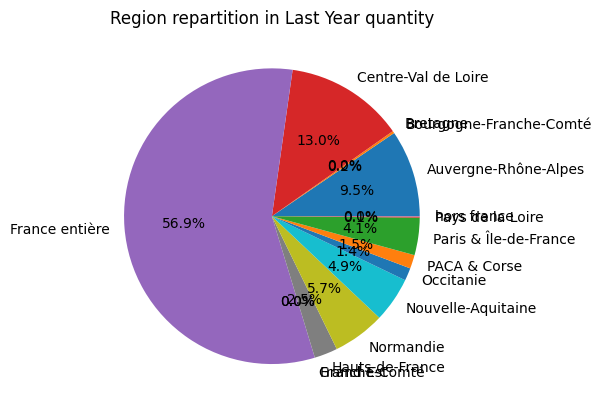

In [120]:
quantity_by_region = sales.groupby("Region")["Quantity"].sum()
quantity_by_region_last_year = sales.groupby("Region")["Quantity Last Year"].sum()
regions = quantity_by_region.keys()

print(quantity_by_region_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region_last_year, labels=quantity_by_region_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities


total quantity this year: 8210.0 units



,Sales (in quantities),Weight (in %)
Region,,
hors france,3.0,0.04
Franche-Comté,4.0,0.05
Bretagne,31.0,0.38
Pays de la Loire,31.0,0.38
Grand Est,65.0,0.79
PACA & Corse,69.0,0.84
Occitanie,105.0,1.28
Bourgogne-Franche-Comté,192.0,2.34
Nouvelle-Aquitaine,291.0,3.54


Text(0.5, 1.0, 'Region repartition in this Year quantity')

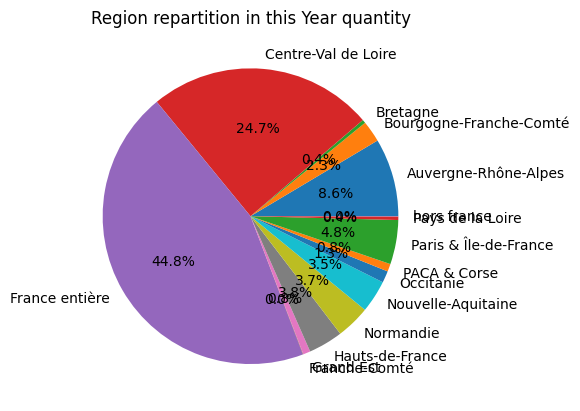

In [136]:
print(quantity_by_region.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_region, labels=quantity_by_region.keys(), autopct='%1.1f%%')
ax.set_title("Regions repartition in this year's Quantities")

### Quantities evolution by Region

,Sales Last Year (in quantities),Sales (in quantities),Evolution (in %)
Region,,,
PACA & Corse,66.0,69.0,4.55
Normandie,252.0,304.0,20.63
Nouvelle-Aquitaine,217.0,291.0,34.10
France entière,2509.0,3681.0,46.71
hors france,2.0,3.0,50.00
Auvergne-Rhône-Alpes,419.0,702.0,67.54
Occitanie,61.0,105.0,72.13
Paris & Île-de-France,180.0,397.0,120.56
Hauts-de-France,112.0,310.0,176.79


Text(0.5, 1.0, 'Sales (in quantities) by region by Year')

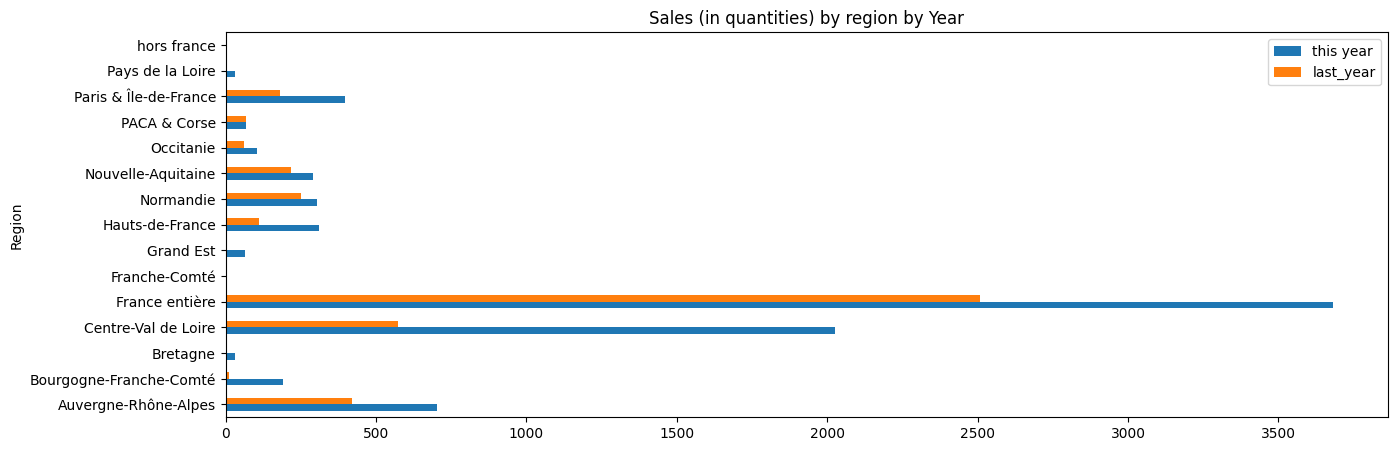

In [137]:
quantity_by_region_evo = pd.concat([quantity_by_region_last_year, quantity_by_region], axis=1)
percentage = (quantity_by_region_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.dropna().sort_values().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_region, "last_year":quantity_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales (in quantities) evolution by Region by Year")

### Conversion Rate evolution by Region

,Views Last Year,Sales Last Year (in quantities),Conversion Rate (in %)
Region,,,
Franche-Comté,34.0,0.0,0.00
hors france,5583.0,2.0,0.04
Bourgogne-Franche-Comté,1811.0,11.0,0.61
Pays de la Loire,551.0,5.0,0.91
Centre-Val de Loire,42628.0,573.0,1.34
France entière,180055.0,2509.0,1.39
PACA & Corse,3866.0,66.0,1.71
Nouvelle-Aquitaine,12459.0,217.0,1.74
Paris & Île-de-France,9080.0,180.0,1.98


,Views,Sales (in quantities),Conversion Rate (in %)
Region,,,
hors france,5724.0,3.0,0.05
PACA & Corse,3020.0,69.0,2.28
Pays de la Loire,1343.0,31.0,2.31
Nouvelle-Aquitaine,12322.0,291.0,2.36
France entière,145123.0,3681.0,2.54
Auvergne-Rhône-Alpes,27213.0,702.0,2.58
Occitanie,3941.0,105.0,2.66
Bourgogne-Franche-Comté,6863.0,192.0,2.80
Franche-Comté,139.0,4.0,2.88


Text(0.5, 1.0, 'Conversion Rate Evolution By region')

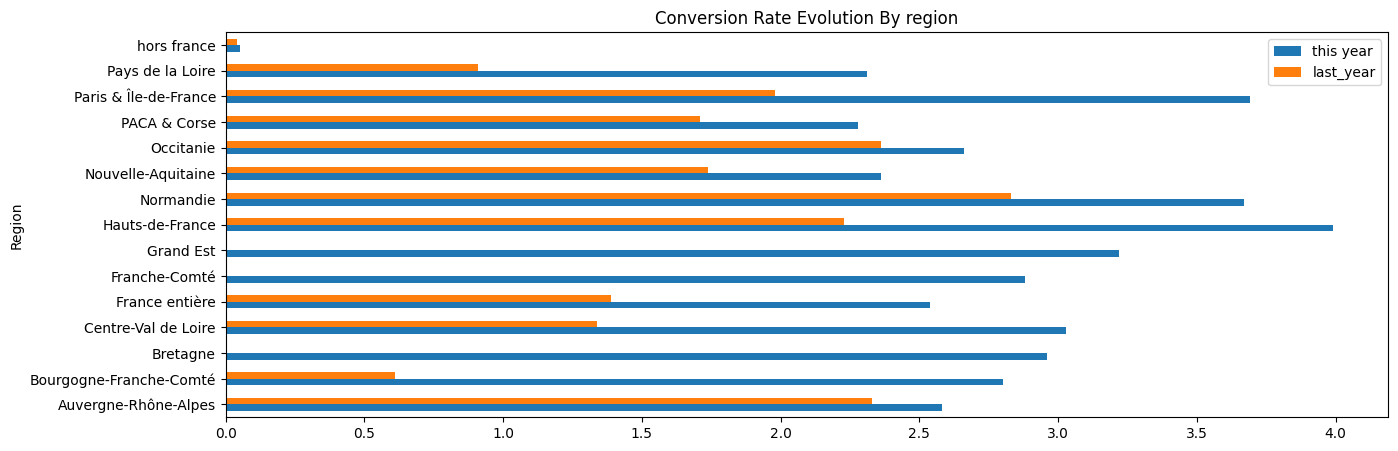

In [138]:
views_by_region = sales.groupby("Region")["Views"].sum()
views_by_region_last_year = sales.groupby("Region")["Views Last Year"].sum()

conversion_rate_by_region = pd.Series((quantity_by_region * 100 / views_by_region).round(2), name="Conversion Rate")
conversion_rate_by_region_last_year = pd.Series((quantity_by_region_last_year * 100 / views_by_region_last_year).round(2), name="Conversion Rate")


print(pd.concat([views_by_region_last_year, quantity_by_region_last_year, conversion_rate_by_region_last_year.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

print("\n")
print(pd.concat([views_by_region, quantity_by_region, conversion_rate_by_region.map(str) + '%'], axis=1).sort_values(by="Conversion Rate"))

df = pd.DataFrame({"this year": conversion_rate_by_region, "last_year":conversion_rate_by_region_last_year}, index=regions)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Conversion Rate Evolution By Region")

## --- Duration ---

### Weight of Duration in last year's Sales

Duration
10.0         0.00
80.0         0.00
70.0         0.00
50.0         0.00
105.0        0.00
150.0        0.00
22.0         0.00
15.0         0.00
12.0         0.00
35.0       183.25
75.0       666.50
40.0       913.08
90.0      4874.08
25.0      8752.59
45.0     15270.67
20.0     42974.59
30.0     61478.92
60.0     64135.08
Name: Sales Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Sales")

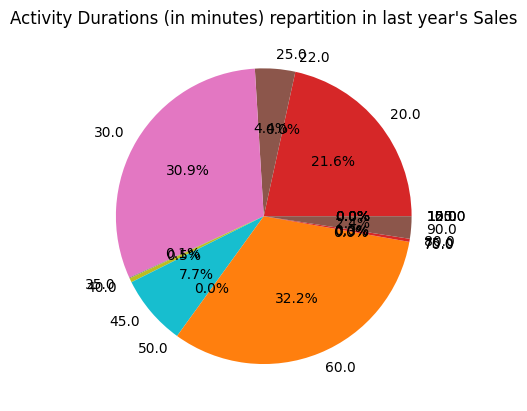

In [107]:
sales_by_duration = sales.groupby("Duration")["Sales"].sum()
sales_by_duration_last_year = sales.groupby("Duration")["Sales Last Year"].sum()
durations = sales_by_duration.keys()

print(sales_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration_last_year, labels=sales_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Sales")

### Weight of Duration in this year's Sales

Duration
12.0          0.00
105.0         0.00
22.0          0.00
35.0          0.00
40.0        384.88
70.0        559.65
150.0       793.22
50.0       1049.65
15.0       1550.73
75.0       1568.58
10.0       3590.07
90.0      11901.40
45.0      12231.81
25.0      12956.41
30.0      57989.86
20.0      79963.59
80.0     112809.80
60.0     309198.65
Name: Sales, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Sales")

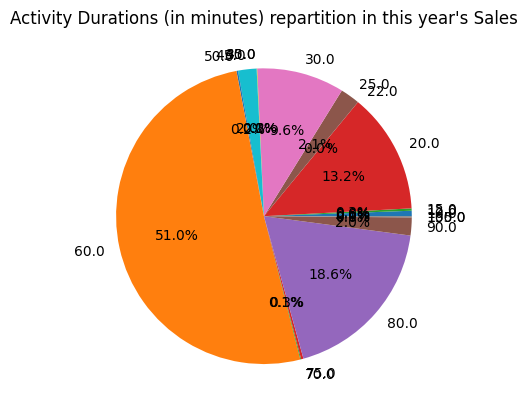

In [108]:
print(sales_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(sales_by_duration, labels=sales_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Sales")

### Sales evolution by Duration

Duration
35.0     -100.0%
40.0     -57.85%
45.0      -19.9%
30.0      -5.68%
25.0      48.03%
20.0      86.07%
75.0     135.35%
90.0     144.18%
60.0     382.11%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Sales, dtype: object


Text(0.5, 1.0, 'Sales evolution (in euros) by Duration by Year')

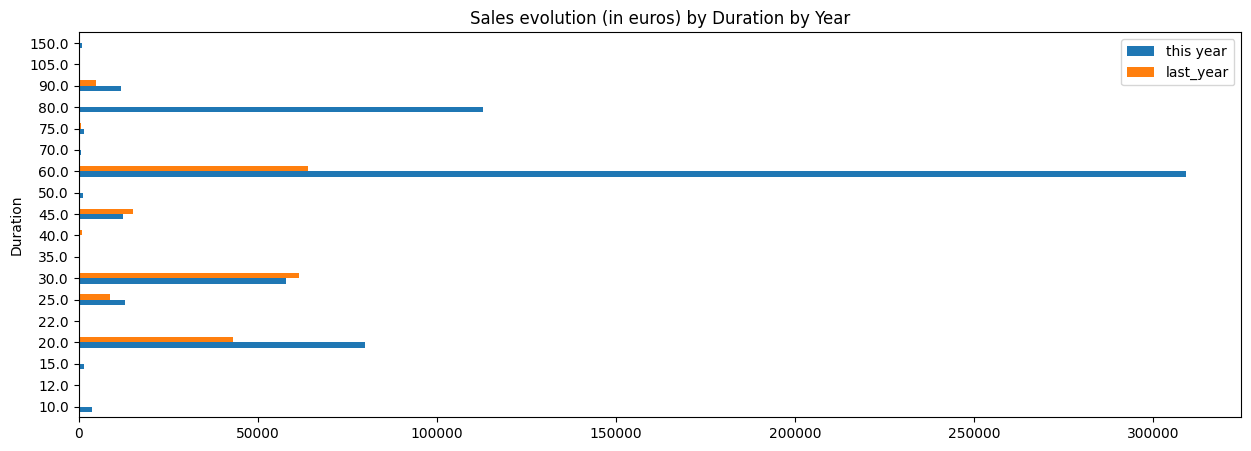

In [109]:
sales_by_duration_evo = pd.concat([sales_by_duration_last_year, sales_by_duration], axis=1)
percentage = (sales_by_duration_evo[['Sales Last Year', 'Sales']].pct_change(axis=1)['Sales'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": sales_by_duration, "last_year":sales_by_duration_last_year}, index=durations)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in euros) by Duration by Year")

### Weight of Duration in last year's Quantities


Duration
10.0       0.0
80.0       0.0
70.0       0.0
50.0       0.0
105.0      0.0
150.0      0.0
22.0       0.0
15.0       0.0
12.0       0.0
35.0       1.0
75.0       2.0
40.0       3.0
90.0      18.0
25.0      30.0
45.0      88.0
30.0     228.0
20.0     231.0
60.0     378.0
Name: Quantity Last Year, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in last year's Quantities")

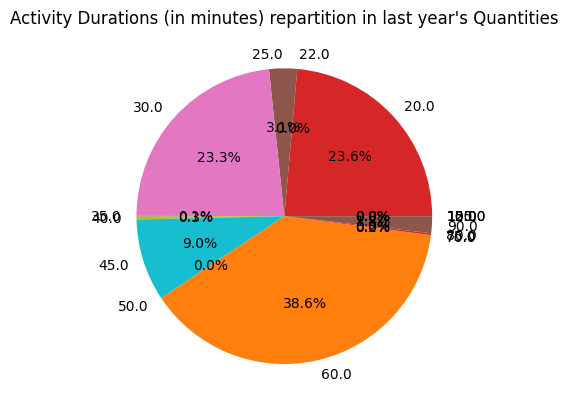

In [110]:
quantity_by_duration = sales.groupby("Duration")["Quantity"].sum()
quantity_by_duration_last_year = sales.groupby("Duration")["Quantity Last Year"].sum()
durations = quantity_by_duration.keys()

print(quantity_by_duration_last_year.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration_last_year, labels=quantity_by_duration_last_year.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in last year's Quantities")

### Weight of Duration in this year's Quantities


Duration
12.0        0.0
105.0       0.0
35.0        0.0
22.0        0.0
40.0        1.0
150.0       1.0
50.0        4.0
70.0        4.0
75.0        5.0
15.0        9.0
10.0       32.0
25.0       41.0
90.0       44.0
45.0       66.0
30.0      279.0
20.0      516.0
80.0      771.0
60.0     1012.0
Name: Quantity, dtype: float64


Text(0.5, 1.0, "Activity Durations (in minutes) repartition in this year's Quantities")

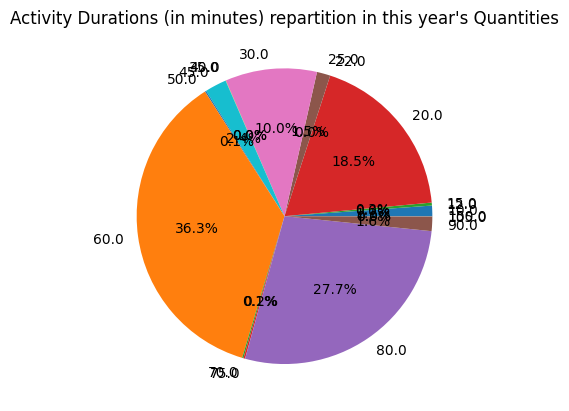

In [111]:
print(quantity_by_duration.sort_values())
fig, ax = plt.subplots()
ax.pie(quantity_by_duration, labels=quantity_by_duration.keys(), autopct='%1.1f%%')
ax.set_title("Activity Durations (in minutes) repartition in this year's Quantities")

### Quantities evolution by Duration

Duration
35.0     -100.0%
40.0     -66.67%
45.0      -25.0%
30.0      22.37%
25.0      36.67%
20.0     123.38%
90.0     144.44%
75.0      150.0%
60.0     167.72%
10.0        inf%
15.0        inf%
50.0        inf%
70.0        inf%
80.0        inf%
150.0       inf%
Name: Quantity, dtype: object


Text(0.5, 1.0, 'Sales evolution (in quantities) by Duration by Year')

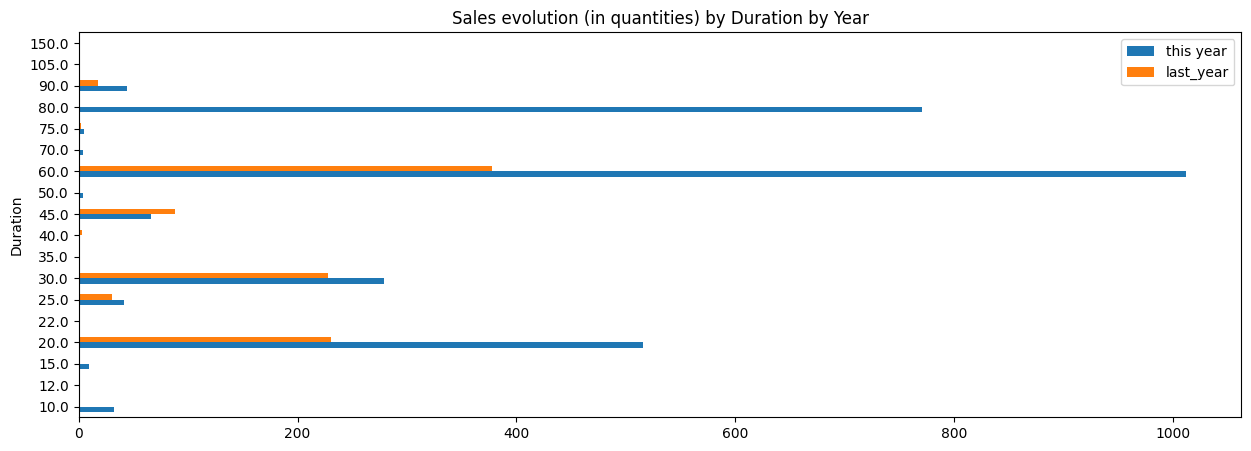

In [112]:
quantity_by_duration_evo = pd.concat([quantity_by_duration_last_year, quantity_by_duration], axis=1)
percentage = (quantity_by_duration_evo[['Quantity Last Year', 'Quantity']].pct_change(axis=1)['Quantity'] * 100).round(2)
print(percentage.sort_values().dropna().map(str) + '%')

df = pd.DataFrame({"this year": quantity_by_duration, "last_year":quantity_by_duration_last_year}, index=durations)
ax = df.plot.barh(figsize=(15, 5))
ax.set_title("Sales evolution (in quantities) by Duration by Year")

## --- Conversion Rate ---



## --- Product Types ---